In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [5]:
dirty_data = pd.read_csv("wrecked_data/animal_data_dirty1.csv", sep=';')
clean_data = pd.read_csv("wrecked_data/animal_data_reworked.csv", index_col=0)
dirty_data["Animal type"].unique()

array([nan, 'European bison', 'European bison™', 'European bisson',
       'European buster', 'lynx', 'lynx?', 'red squirel', 'red squirrel',
       'red squirrell', 'hedgehog', 'wedgehod', 'ledgehod'], dtype=object)

In [3]:
dirty_data.describe()

,Weight kg,Body Length cm,Animal code,Latitude,Longitude
count,984.000000,984.000000,0.0,913.000000,913.000000
mean,39.745503,39.107724,NaN,49.393369,18.203280
std,156.290076,58.628601,NaN,7.168900,3.899601
min,-0.252000,-19.000000,NaN,-78.582973,11.074008
25%,0.293000,19.000000,NaN,48.186913,14.384559
50%,0.331500,21.000000,NaN,49.560723,18.944015
75%,0.800000,23.000000,NaN,52.212433,21.033243
max,1100.000000,350.000000,NaN,52.853843,34.896734


In [4]:
clean_data.describe()

,Weight_in_kg,Body_length_in_cm,Latitude,Longitude
count,833.000000,833.000000,750.000000,750.000000
mean,46.720602,42.501043,49.743041,17.595264
std,168.843218,62.879887,1.851982,3.881169
min,0.200000,11.000000,47.316383,11.074008
25%,0.297367,19.000000,48.186430,14.348471
50%,0.349000,21.000000,49.545885,18.847488
75%,1.000000,23.000000,52.211980,21.031909
max,1100.000000,350.000000,52.853843,23.919668


In [5]:
df = clean_data.copy()
ndf = df.select_dtypes(include='number')

ndf.mean(), ndf.median()

(Weight_in_kg         46.720602
 Body_length_in_cm    42.501043
 Latitude             49.743041
 Longitude            17.595264
 dtype: float64,
 Weight_in_kg          0.349000
 Body_length_in_cm    21.000000
 Latitude             49.545885
 Longitude            18.847488
 dtype: float64)

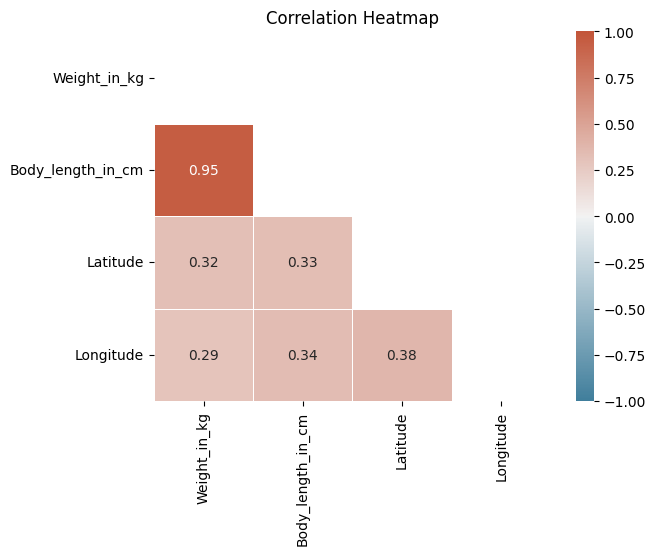

In [6]:
corr = ndf.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

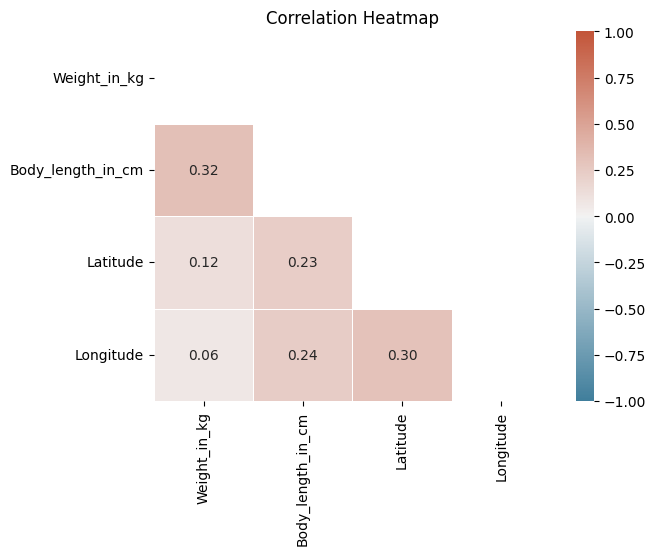

In [7]:
corr = ndf.corr(method='kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

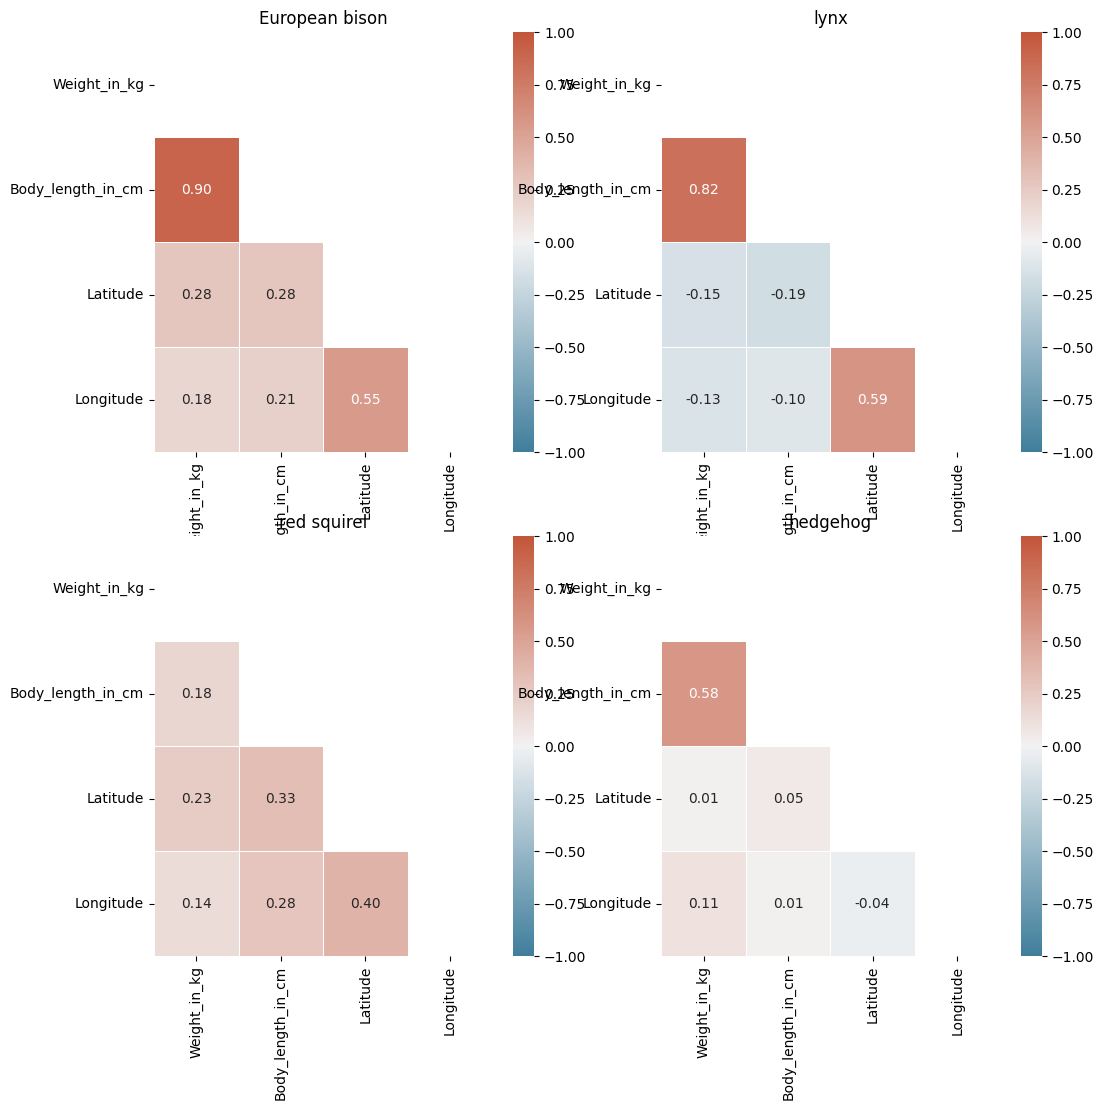

In [17]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("European bison")
corr = df[df["Animal_type"] == "European bison"].select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.subplot(2, 2, 2)
plt.title("lynx")
corr = df[df["Animal_type"] == "lynx"].select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.subplot(2, 2, 3)
plt.title("red squirel")
corr = df[df["Animal_type"] == "red squirrel"].select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.subplot(2, 2, 4)
plt.title("hedgehog")
corr = df[df["Animal_type"] == "hedgehog"].select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.show()

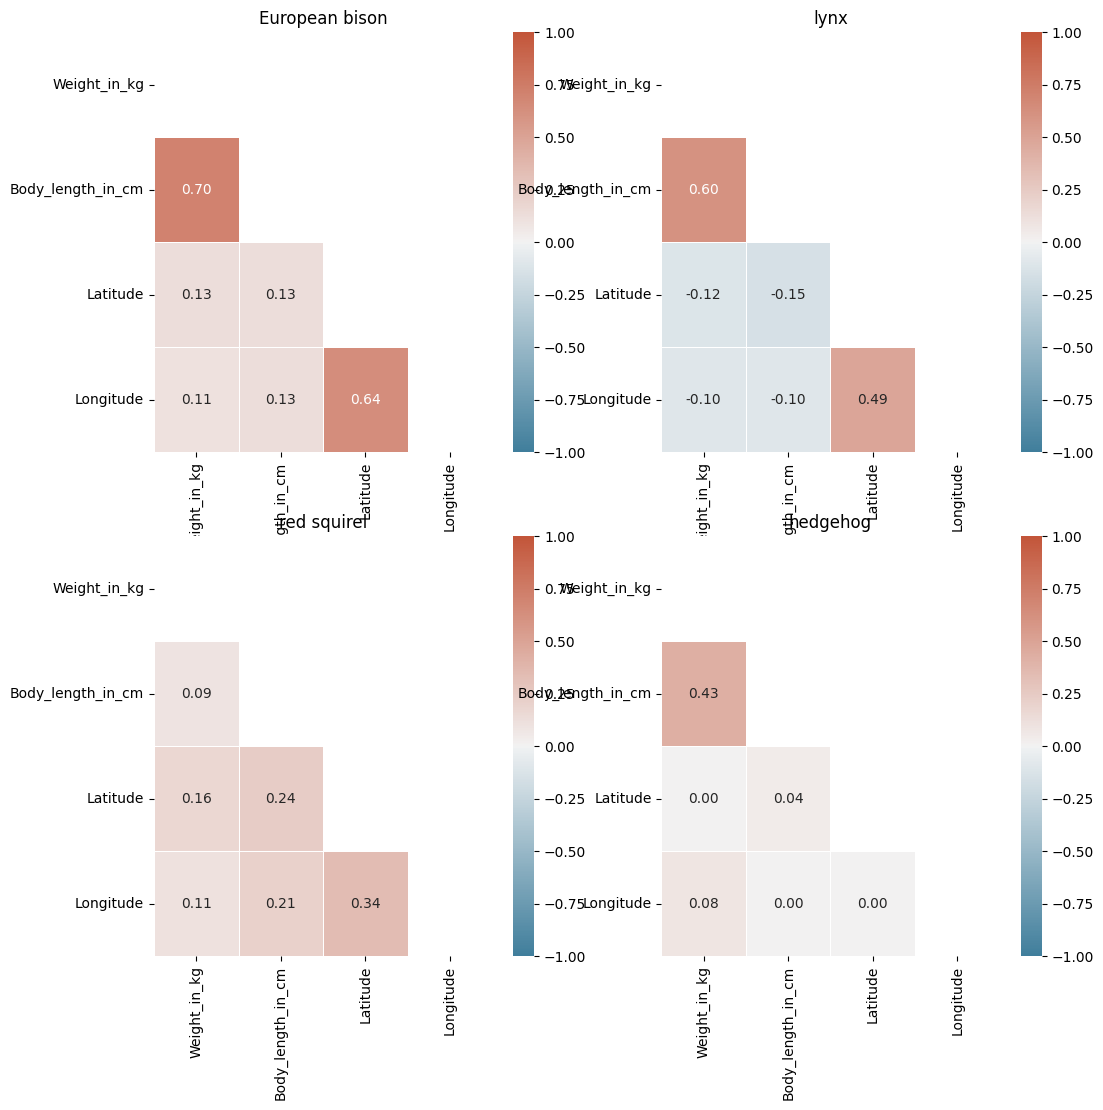

In [16]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("European bison")
corr = df[df["Animal_type"] == "European bison"].select_dtypes(include='number').corr(method='kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.subplot(2, 2, 2)
plt.title("lynx")
corr = df[df["Animal_type"] == "lynx"].select_dtypes(include='number').corr(method='kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.subplot(2, 2, 3)
plt.title("red squirel")
corr = df[df["Animal_type"] == "red squirrel"].select_dtypes(include='number').corr(method='kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.subplot(2, 2, 4)
plt.title("hedgehog")
corr = df[df["Animal_type"] == "hedgehog"].select_dtypes(include='number').corr(method='kendall')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

a = dirty_data[dirty_data["Animal type"] == "lynx"]["Weight kg"]
b = dirty_data[dirty_data["Animal type"] == "lynx?"]["Weight kg"]

t_stat, p_val = ttest_ind(a, b)
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: 0.28872058707288334 p-value: 0.7736608274782608


In [ ]:
a = dirty_data[dirty_data["Animal type"] == "lynx"]["Body Length cm"]
b = dirty_data[dirty_data["Animal type"] == "lynx?"]["Body Length cm"]

t_stat, p_val = ttest_ind(a, b)
print("t-statistic:", t_stat, "p-value:", p_val)

t-statistic: -0.5793803445653539 p-value: 0.5642194350169902


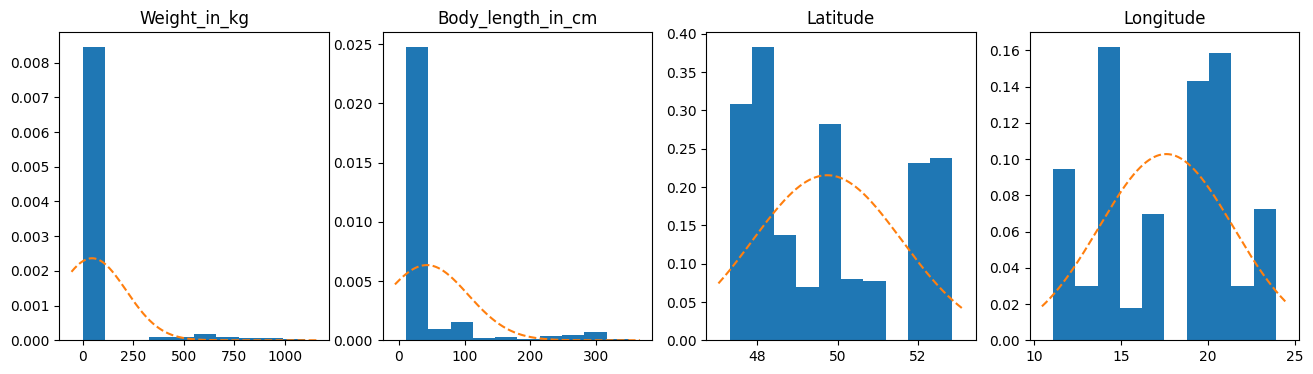

In [ ]:
keys = ["Weight_in_kg", "Body_length_in_cm", "Latitude", "Longitude"]

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

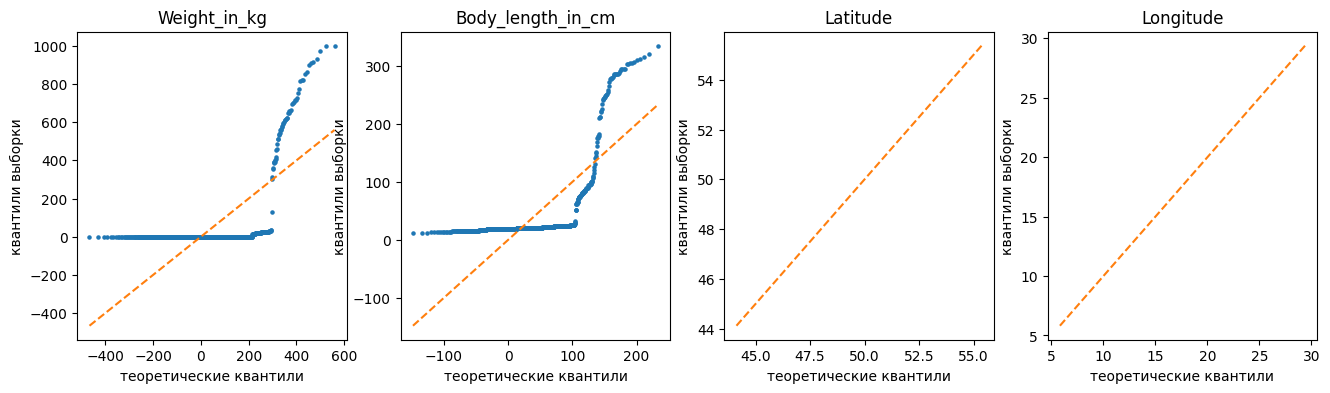

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

In [ ]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Weight_in_kg
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9303721488595438
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9351740696278511
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9531812725090036

Body_length_in_cm
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9207683073229291
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.936374549819928
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9495798319327731

Latitude
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.5126050420168067
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9003601440576231
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9003601440576231

Longitude
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6374549819927972
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9003601440576231
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9003601440576231



In [ ]:
squirels = df[df["Animal_type"] == "red squirrel"]
squirels

,Animal_type,Country,Weight_in_kg,Body_length_in_cm,Gender,Latitude,Longitude,Animal_name,Observation_date,Data_compiled_by
9,red squirrel,Poland,0.308,22.0,female,52.241273,21.055745,Basia,2024-03-01,Anne Anthony
10,red squirrel,Poland,0.348,20.0,female,52.242060,21.057802,unknown,2024-03-01,Anne Anthony
11,red squirrel,Poland,0.316,20.0,male,52.240035,21.056188,Lolek,2024-03-01,Anne Anthony
12,red squirrel,Poland,0.340,21.0,Unknown,52.240284,21.051948,unknown,2024-03-01,Anne Anthony
13,red squirrel,Poland,0.333,21.0,male,NaN,NaN,unknown,2024-03-01,Anne Anthony
...,...,...,...,...,...,...,...,...,...,...
987,red squirrel,Poland,0.317,19.0,female,52.212310,21.033586,Zuzia,2024-05-04,Anne Anthony
998,red squirrel,Poland,0.301,22.0,male,52.212760,21.034189,unknown,2024-05-06,Anne Anthony
999,red squirrel,Poland,0.343,22.0,male,52.212497,21.033515,unknown,2024-05-06,Anne Anthony
1000,red squirrel,Poland,0.307,20.0,female,52.212144,21.033534,unknown,2024-05-06,Anne Anthony


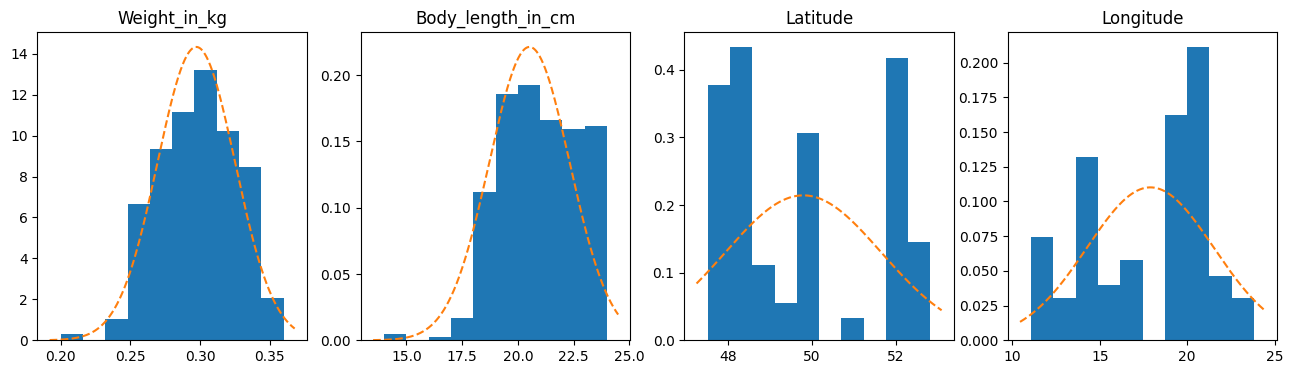

In [ ]:
keys = ["Weight_in_kg", "Body_length_in_cm", "Latitude", "Longitude"]

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(squirels[key], density=True)
    
    loc = squirels[key].mean()
    scale = squirels[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

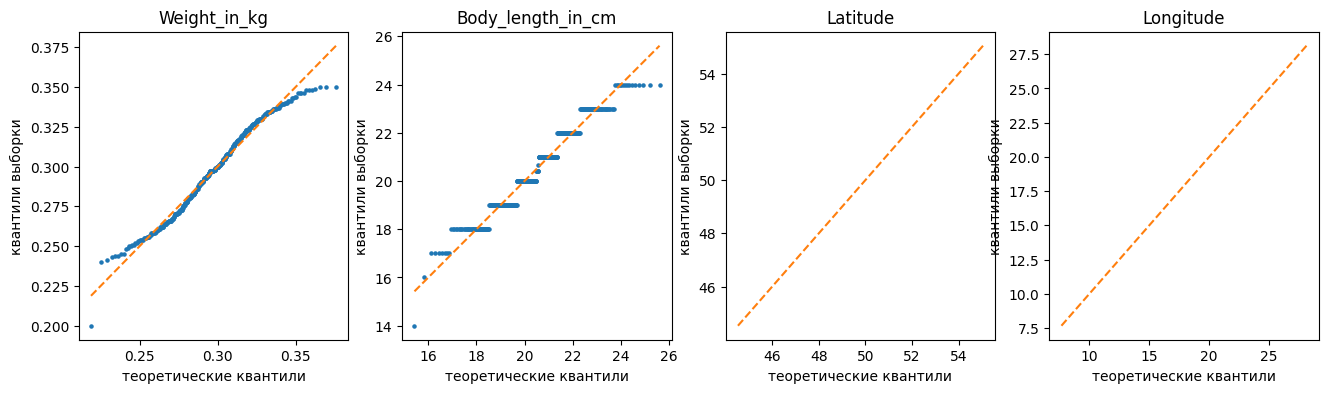

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = squirels[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

In [ ]:
for key in keys:
    print(key)
    
    samples = squirels[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Weight_in_kg
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6223277909738717
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9881235154394299
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.995249406175772

Body_length_in_cm
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7030878859857482
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9928741092636579
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.995249406175772

Latitude
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.4014251781472684
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.8028503562945368
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.8028503562945368

Longitude
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.5629453681710214
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.8028503562945368
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.8028503562945368



In [ ]:
def statistic(samples: np.ndarray) -> float:
    return (samples.mean() - 1) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

alpha = 0.05

In [ ]:
n = squirels["Body_length_in_cm"].shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(np.float64(-1.9656282844817121), np.float64(1.9656282844817117))

In [ ]:
S = statistic(squirels["Body_length_in_cm"])
S

np.float64(221.98191929354076)

In [ ]:
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

np.float64(0.0)